<a href="https://colab.research.google.com/github/carlosasenciom/SIM_YAC_ASENCIO_UPSE2023/blob/main/DIA2.3_VARIACION_DX_DT.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [27]:
# Simulador ecuacion de la difusividad 
import numpy as np
import math
L=1000 #distancia total 
dx=25 #delta x
Distance=np.arange(0,L+1,dx) #Crear un vector de las distancias
P01=np.ones_like(Distance) #Vector inical de Presiones 
print(P01)

[1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1]


In [28]:
PYac=4000
PFrontd=0 #Frontera derecha
PFronti=0 #Frontera izquierda
Tiempo=200000
DT=100
VectorTiempo=np.arange(0,math.floor(Tiempo/DT)*DT,DT)
PXX=np.zeros((math.floor(Tiempo/DT),len(Distance)))
Pdt=np.zeros_like(Distance)

In [29]:
PXX.shape

(2000, 41)

In [30]:
P01=np.ones_like(Distance)
P01=P01*PYac
P01[0]=PFronti
P01[len(P01)-1]=PFrontd
P0in=P01 #Condicion inicial 
Pdt=P01 #Vector de resultados dt
t=DT #primera interaccion

In [31]:
print(P01)

[   0 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000
 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000 4000    0]


In [32]:
def Presdt(P1,P2,P3,deltat,deltax):
  return(((P1-2*P2+P3)/(deltax*deltax))*deltat)+P2

In [33]:
PXX[0]=P01
while t<Tiempo:
    for i in range(0,len(P0in)-1):
      if i==0:
        Pdt[i]=P0in[0]
      elif i==len(P0in)-1:
        Pdt[i]=P0in[len(P0in)-1]
      else:
        Pdt[i]=Presdt(P0in[i-1],P0in[i],P0in[i+1],DT,dx)
    PXX[math.floor(t/DT)]=Pdt
    t=t+DT
    P0in=Pdt
    P01=np.append(P01,Pdt)

In [34]:
PXX

array([[0.000e+00, 4.000e+03, 4.000e+03, ..., 4.000e+03, 4.000e+03,
        0.000e+00],
       [0.000e+00, 3.360e+03, 3.897e+03, ..., 3.999e+03, 3.359e+03,
        0.000e+00],
       [0.000e+00, 2.908e+03, 3.752e+03, ..., 3.896e+03, 2.907e+03,
        0.000e+00],
       ...,
       [0.000e+00, 2.000e+00, 4.000e+00, ..., 2.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.000e+00, 4.000e+00, ..., 2.000e+00, 1.000e+00,
        0.000e+00],
       [0.000e+00, 2.000e+00, 4.000e+00, ..., 2.000e+00, 1.000e+00,
        0.000e+00]])

In [35]:
PXX.shape

(2000, 41)

In [36]:
Distance.shape

(41,)

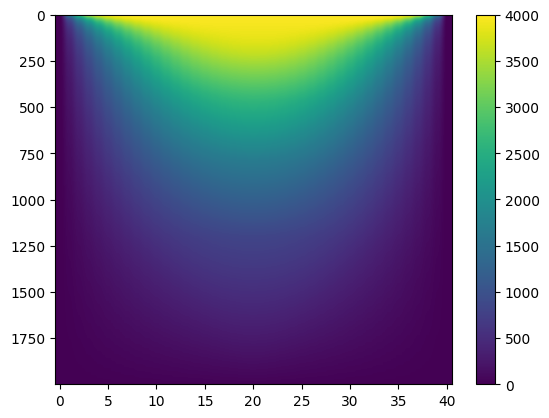

In [37]:
import matplotlib.pyplot as plt

imgplot = plt.imshow(PXX,aspect='auto')
plt.colorbar()

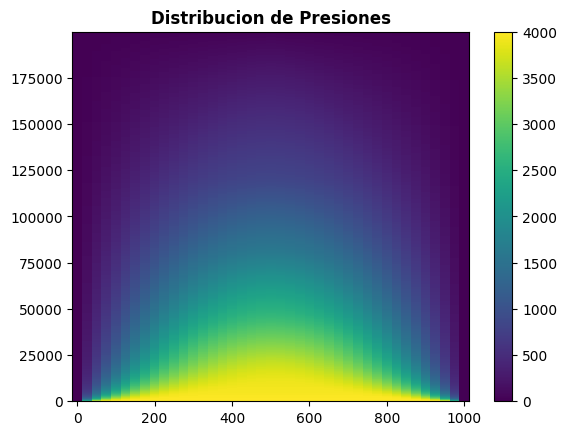

In [38]:
c = plt.pcolormesh(Distance,VectorTiempo,PXX)
plt.colorbar(c)
 
plt.title('Distribucion de Presiones', fontweight ="bold")
plt.show()